In [421]:
# Importing relevant libraries
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [422]:
# Fetch historical stock data using yfinance (for example, Reliance Industries)

stock_input = 'CIPLA'
stock = stock_input + '.NS'
ticker = yf.Ticker(stock)

# Fetch the last 5 days of data with 5-minute intervals
hist_data = ticker.history(period="1mo", interval="5m")

# Printing DataFrame
hist_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-08-26 09:15:00+05:30,1570.550049,1572.849976,1567.000000,1571.349976,0,0.0,0.0
2024-08-26 09:20:00+05:30,1570.650024,1574.349976,1570.650024,1572.650024,13076,0.0,0.0
2024-08-26 09:25:00+05:30,1573.599976,1576.300049,1573.099976,1576.300049,8051,0.0,0.0
2024-08-26 09:30:00+05:30,1575.900024,1578.000000,1575.650024,1578.000000,10501,0.0,0.0
2024-08-26 09:35:00+05:30,1577.949951,1579.500000,1577.300049,1579.400024,8011,0.0,0.0


In [423]:
# Removing timezone information from the Datetime index
hist_data.index = hist_data.index.tz_localize(None)

# Removing redundant columns
hist_data = hist_data.drop(['Volume', 'Dividends', 'Stock Splits'], axis=1)

# Rounding the prices to two decimal places nearest to .05
hist_data = hist_data.apply(lambda x: round(x, 2))

# Printing the DataFrame
hist_data.head()

,Open,High,Low,Close
Datetime,,,,
2024-08-26 09:15:00,1570.55,1572.85,1567.00,1571.35
2024-08-26 09:20:00,1570.65,1574.35,1570.65,1572.65
2024-08-26 09:25:00,1573.60,1576.30,1573.10,1576.30
2024-08-26 09:30:00,1575.90,1578.00,1575.65,1578.00
2024-08-26 09:35:00,1577.95,1579.50,1577.30,1579.40


In [424]:
# Simple Moving Average 20
# hist_data['SMA20'] = hist_data['Close'].rolling(window=20).mean()

# Simple Moving Average 50
hist_data['SMA50'] = round(hist_data['Close'].rolling(window=50).mean(), 2)
hist_data['SMA50'] = round(hist_data['SMA50'] * 20) / 20

# Standard Deviation
# hist_data['stdev'] = hist_data['Close'].rolling(window=20).std()

# upper band
hist_data['bb_upper'] = hist_data['Close'].rolling(window=20).mean() + (2 * hist_data['Close'].rolling(window=20).std())
hist_data['bb_upper'] = round(hist_data['bb_upper'] * 20) / 20

# lower band
hist_data['bb_lower'] = hist_data['Close'].rolling(window=20).mean() - (2 * hist_data['Close'].rolling(window=20).std())
hist_data['bb_lower'] = round(hist_data['bb_lower'] * 20) / 20

# Checking increasing SMA50
hist_data['SMA_change'] = (hist_data['SMA50'].shift(1) < hist_data['SMA50']).astype(int)

# Fill the NAN values with 0
hist_data.fillna(0, inplace=True)

In [425]:
# Printing the DataFrame
hist_data.head()

,Open,High,Low,Close,SMA50,bb_upper,bb_lower,SMA_change
Datetime,,,,,,,,
2024-08-26 09:15:00,1570.55,1572.85,1567.00,1571.35,0.0,0.0,0.0,0
2024-08-26 09:20:00,1570.65,1574.35,1570.65,1572.65,0.0,0.0,0.0,0
2024-08-26 09:25:00,1573.60,1576.30,1573.10,1576.30,0.0,0.0,0.0,0
2024-08-26 09:30:00,1575.90,1578.00,1575.65,1578.00,0.0,0.0,0.0,0
2024-08-26 09:35:00,1577.95,1579.50,1577.30,1579.40,0.0,0.0,0.0,0


In [426]:
# Changing the Timestone to Indian Time
now = pd.Timestamp.now(tz='Asia/Kolkata')

# Choosing a particular date to plot
plot_data = hist_data.loc['2024-09-04']

In [427]:
# Getting SMA_change column to make a new column for checking consecutive increase in SMA50
sma_change = hist_data['SMA_change'].to_list()

# Generating a new column to check consecutive increase in SMA50
rising_sma = []
rising_sma.insert(0, sma_change[0])     # Inserting first element of sma_change to rising_sma list for easy comparison

for i in range(1, len(sma_change)):
    
    if sma_change[i] == 0:
        rising_sma.insert(i, 0)
        
    else:
        if sma_change[i-1] == 0:
            rising_sma.insert(i, 1)
        else:
            rising_sma.insert(i, rising_sma[i-1] + 1)

# Adding the new column to the DataFrame
hist_data['SMA_rising_cumulative'] = rising_sma 

# Printing DataFrame to see changes
hist_data.head()

,Open,High,Low,Close,SMA50,bb_upper,bb_lower,SMA_change,SMA_rising_cumulative
Datetime,,,,,,,,,
2024-08-26 09:15:00,1570.55,1572.85,1567.00,1571.35,0.0,0.0,0.0,0,0
2024-08-26 09:20:00,1570.65,1574.35,1570.65,1572.65,0.0,0.0,0.0,0,0
2024-08-26 09:25:00,1573.60,1576.30,1573.10,1576.30,0.0,0.0,0.0,0,0
2024-08-26 09:30:00,1575.90,1578.00,1575.65,1578.00,0.0,0.0,0.0,0,0
2024-08-26 09:35:00,1577.95,1579.50,1577.30,1579.40,0.0,0.0,0.0,0,0


In [428]:
# Finding the difference between values of SMA 50 and Lower Bollinger Band
lower_bb = hist_data['bb_lower']
sma50 = hist_data['SMA50']

# Adding the created column
hist_data['lower_bb_sma50_diff'] = abs(((sma50 - lower_bb) / sma50 * 100).round(3)).fillna(0)

# Printing the DataFrame to see changes
hist_data.head()

,Open,High,Low,Close,SMA50,bb_upper,bb_lower,SMA_change,SMA_rising_cumulative,lower_bb_sma50_diff
Datetime,,,,,,,,,,
2024-08-26 09:15:00,1570.55,1572.85,1567.00,1571.35,0.0,0.0,0.0,0,0,0.0
2024-08-26 09:20:00,1570.65,1574.35,1570.65,1572.65,0.0,0.0,0.0,0,0,0.0
2024-08-26 09:25:00,1573.60,1576.30,1573.10,1576.30,0.0,0.0,0.0,0,0,0.0
2024-08-26 09:30:00,1575.90,1578.00,1575.65,1578.00,0.0,0.0,0.0,0,0,0.0
2024-08-26 09:35:00,1577.95,1579.50,1577.30,1579.40,0.0,0.0,0.0,0,0,0.0


In [429]:
# Defining the function buying_candle
# This function takes the DataFrame and OHCL values as input and
# provides a column with boolean value True for buying candles.
def buying_candle(df, Open='Open', High='High', Low='Low', Close='Close'):
    '''To find buying candle for our setup.'''
    is_buying = []
    for index, row in df.iterrows():
        avg = (max(row[[Open, High, Low, Close]]) + min(row[[Open, High, Low, Close]])) / 2
        if row[Close] >= avg:
            is_buying.append(True)
        else:
            is_buying.append(False)

    return is_buying

# Adding is_buying column using buying_candle function
hist_data['is_buying'] = buying_candle(hist_data)

# Printing the DataFrame to see changes
hist_data.head()

,Open,High,Low,Close,SMA50,bb_upper,bb_lower,SMA_change,SMA_rising_cumulative,lower_bb_sma50_diff,is_buying
Datetime,,,,,,,,,,,
2024-08-26 09:15:00,1570.55,1572.85,1567.00,1571.35,0.0,0.0,0.0,0,0,0.0,True
2024-08-26 09:20:00,1570.65,1574.35,1570.65,1572.65,0.0,0.0,0.0,0,0,0.0,True
2024-08-26 09:25:00,1573.60,1576.30,1573.10,1576.30,0.0,0.0,0.0,0,0,0.0,True
2024-08-26 09:30:00,1575.90,1578.00,1575.65,1578.00,0.0,0.0,0.0,0,0,0.0,True
2024-08-26 09:35:00,1577.95,1579.50,1577.30,1579.40,0.0,0.0,0.0,0,0,0.0,True


Change the below.

In [431]:
# Creating a new column to check whether price was near ma or not
low_price = hist_data['Low']
low_near_sma = []

for i, v in zip(sma50, low_price):
    if i == 0:
        low_near_sma.append(False)
    elif (((i-v) / i * 100) >= -0.01) or (((i-v) / i * 100) <= -0.03):
        low_near_sma.append(True)
    else:
        low_near_sma.append(False)

# Adding the column to the DataFrame
hist_data['candle_near_sma'] = low_near_sma

# Printing the DataFrame to see changes
hist_data.head()

,Open,High,Low,Close,SMA50,bb_upper,bb_lower,SMA_change,SMA_rising_cumulative,lower_bb_sma50_diff,is_buying,candle_near_sma
Datetime,,,,,,,,,,,,
2024-08-26 09:15:00,1570.55,1572.85,1567.00,1571.35,0.0,0.0,0.0,0,0,0.0,True,False
2024-08-26 09:20:00,1570.65,1574.35,1570.65,1572.65,0.0,0.0,0.0,0,0,0.0,True,False
2024-08-26 09:25:00,1573.60,1576.30,1573.10,1576.30,0.0,0.0,0.0,0,0,0.0,True,False
2024-08-26 09:30:00,1575.90,1578.00,1575.65,1578.00,0.0,0.0,0.0,0,0,0.0,True,False
2024-08-26 09:35:00,1577.95,1579.50,1577.30,1579.40,0.0,0.0,0.0,0,0,0.0,True,False


In [432]:
# Creating variable for High Low column indexes 
high = hist_data.columns.get_loc('High')
low = hist_data.columns.get_loc('Low')

# Creating a new column swing to check whether there was a proper swing before entry candle
swing = []
for i in range(0, hist_data.shape[0]):
    if i < 5:
        swing.append(False)
    else:
        df = hist_data.iloc[i-5 : i]
        lower_lows = []
        for v in range(1, df.shape[0]):
            if (df.iloc[v, high] < df.iloc[v-1, high]) & (df.iloc[v, low] < df.iloc[v-1, low]):
                lower_lows.append(True)
            else:
                lower_lows.append(False)

        if sum(lower_lows) >= 3:
            swing.append(True)
        else:
            swing.append(False)

hist_data['swing'] = swing

# Printing DataFrame to see changes
hist_data.head()

,Open,High,Low,Close,SMA50,bb_upper,bb_lower,SMA_change,SMA_rising_cumulative,lower_bb_sma50_diff,is_buying,candle_near_sma,swing
Datetime,,,,,,,,,,,,,
2024-08-26 09:15:00,1570.55,1572.85,1567.00,1571.35,0.0,0.0,0.0,0,0,0.0,True,False,False
2024-08-26 09:20:00,1570.65,1574.35,1570.65,1572.65,0.0,0.0,0.0,0,0,0.0,True,False,False
2024-08-26 09:25:00,1573.60,1576.30,1573.10,1576.30,0.0,0.0,0.0,0,0,0.0,True,False,False
2024-08-26 09:30:00,1575.90,1578.00,1575.65,1578.00,0.0,0.0,0.0,0,0,0.0,True,False,False
2024-08-26 09:35:00,1577.95,1579.50,1577.30,1579.40,0.0,0.0,0.0,0,0,0.0,True,False,False


In [433]:
# Adding a new column to check if previous candle high is broken
hist_data['high_break'] = (hist_data['High'].shift(-1) > hist_data['High']) | (hist_data['High'].shift(-2) > hist_data['High'])

# Printing DataFrame to see the changes
hist_data.head()

,Open,High,Low,Close,SMA50,bb_upper,bb_lower,SMA_change,SMA_rising_cumulative,lower_bb_sma50_diff,is_buying,candle_near_sma,swing,high_break
Datetime,,,,,,,,,,,,,,
2024-08-26 09:15:00,1570.55,1572.85,1567.00,1571.35,0.0,0.0,0.0,0,0,0.0,True,False,False,True
2024-08-26 09:20:00,1570.65,1574.35,1570.65,1572.65,0.0,0.0,0.0,0,0,0.0,True,False,False,True
2024-08-26 09:25:00,1573.60,1576.30,1573.10,1576.30,0.0,0.0,0.0,0,0,0.0,True,False,False,True
2024-08-26 09:30:00,1575.90,1578.00,1575.65,1578.00,0.0,0.0,0.0,0,0,0.0,True,False,False,True
2024-08-26 09:35:00,1577.95,1579.50,1577.30,1579.40,0.0,0.0,0.0,0,0,0.0,True,False,False,True


In [434]:
# Filtering based on conditions of setup ABC50
# Condition 1: SMA 50 is rising from last 10 candles
con1 = hist_data[hist_data['SMA_rising_cumulative'] >= 10]

# Condition 2: Lower Bollinger Band is near the rising SMA 50
con2 = con1[con1['lower_bb_sma50_diff'] <= 0.01]

# Condition 3: Candle is made near rising SMA 50
con3 = con2[con2['candle_near_sma'] == True]

# Condition 4: Candle made was a buying candle
con4 = con3[con3['is_buying'] == True]

# Condition 5: There are at least 4 lower swing candles before buying candle
con5 = con4[con4['swing'] == True]

# Condition 6: The buying candle's high is broken in the next candle
con6 = con5[con5['high_break'] == True].copy()

# Condition 7: The trade is before 3 PM or not
con7 = con6[con6.index.time < dt.time(15, 00)]

# Printing the DataFrame after filtering
con7

,Open,High,Low,Close,SMA50,bb_upper,bb_lower,SMA_change,SMA_rising_cumulative,lower_bb_sma50_diff,is_buying,candle_near_sma,swing,high_break
Datetime,,,,,,,,,,,,,,


In [435]:
# We are going to make charts to visually show the setup
# Creating plot_times list to get indexes of setup candle times 
# and get last 30 and next 30 rows for easy visuallization

# First we will check if there are any trades were found.
if con7.shape[0] == 0 :
    print('No Trades were found')

else:
    plot_times = []
    for i in con7.index:
        index_value = hist_data.index.get_loc(i)
        before_candle = hist_data.iloc[index_value - 30,:].name
        after_candle = hist_data.iloc[index_value + 30,:].name
        plot_times.append((before_candle, after_candle))

No Trades were found


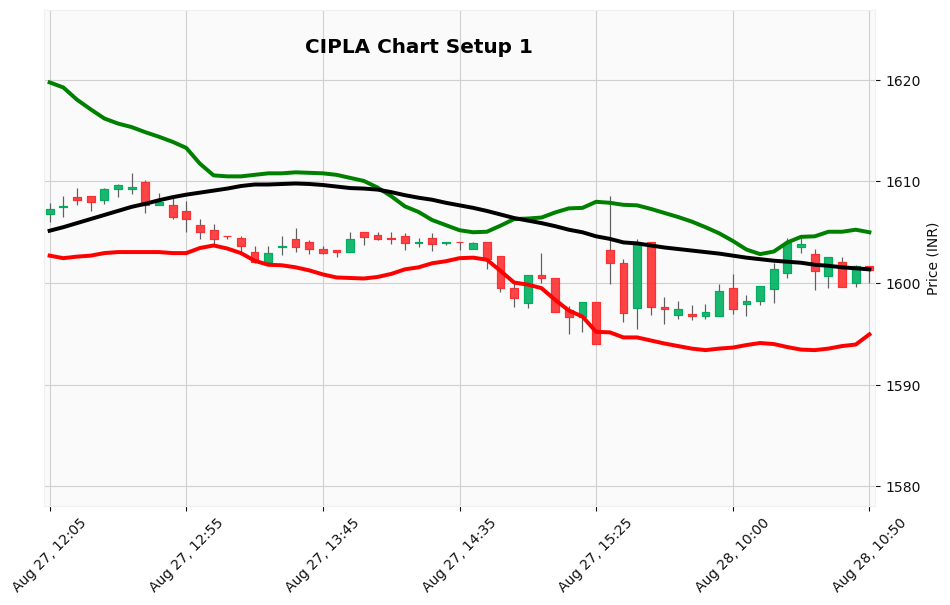

In [436]:
# We are going to create charts for every buying setup using plot_times list
# The for loop would extract a dataframe of times in plot_times list and 
# plot the chart using mplfinance library
chart_num = 1
for start, end in plot_times:
    plot_data = hist_data.loc[start : end]
    min_max_values = (plot_data[['Open', 'High', 'Low', 'Close']].min().min() * 0.99,
                      plot_data[['Open', 'High', 'Low', 'Close']].max().max() * 1.01)
    
    apds = ([mpf.make_addplot(plot_data['bb_upper'], color='green'),
             mpf.make_addplot(plot_data['bb_lower'], color='red'),
             mpf.make_addplot(plot_data['SMA50'], color='black')])
    
    mpf.plot(plot_data, type='candle', 
             style='yahoo', title= stock_input +" Chart Setup " + str(chart_num),
             ylabel='Price (INR)',
             figratio=(20,12),
             tight_layout=True,
             ylim = min_max_values,
             addplot=apds)
    
    plt.show()
    chart_num += 1

In [437]:
# Checking profitability
# Condition 1: Hits Target of 1:2 based on SL.
# Condition 2: Has to hit target before 3:15 PM on the same day, otherwise exit at 3:15 PM, we will call it cost.
# Condition 3: Will not enter into the trade after 3:00 PM.

# Finding Stop Losses
sl = []

for i in con7.index:
    # candle_high = con6.loc[i: 'High']
    location = hist_data.index.get_loc(i)
    if hist_data.iloc[location, low] < hist_data.iloc[location-1, low]:
        sl.append(hist_data.iloc[location, low])

    else:
        sl.append(hist_data.iloc[location-1, low])

# Adding sl to con6 DataFrame
con7['sl'] = sl

# Creating target of 1:2 based on sl
con7['target'] = con7['High'] + 2 * (con7['High'] - con7['sl'])

# Printing the con6 DataFrame
con7

,Open,High,Low,Close,SMA50,bb_upper,bb_lower,SMA_change,SMA_rising_cumulative,lower_bb_sma50_diff,is_buying,candle_near_sma,swing,high_break,sl,target
Datetime,,,,,,,,,,,,,,,,


In [438]:
outcome = {'SL': 0, 'Target': 0, 'Cost': 0}

for i in con6.index:
    sl = con6.loc[i, 'sl']
    target = con6.loc[i, 'target']
    closing_time = dt.datetime.combine(i.date(), dt.time(15, 10))
    trade = hist_data.loc[i: closing_time, :]
    for index, row in trade.iterrows():
        if index.time() > i.time():
            if index.time() < dt.time(15, 10):
                if row['Low'] <= sl:
                    outcome['SL'] = outcome.get('SL', 0) + 1
                    break
                elif row['High'] >= target:
                    outcome['Target'] = outcome.get('Target', 0) + 1
                    break
            else:
                outcome['Cost'] = outcome.get('Cost', 0) + 1
                break

In [439]:
# Profit and Loss Percentage
print(str(con7.shape[0]) + ' entries were made.')
print('Stop Loss hit ' + str(outcome['SL']) + ' of the times.')
print('Target hit ' + str(outcome['Target']) + ' of the times.')
print('Cost hit ' + str(outcome['Cost']) + ' of the times.')

0 entries were made.
Stop Loss hit 0 of the times.
Target hit 0 of the times.
Cost hit 0 of the times.
